# 목표 :
###  Class와 def 으로 모듈화된 기계학습 프로세스를 학습 과정까지 구현해본다.

# 
### 4번 문제 : 
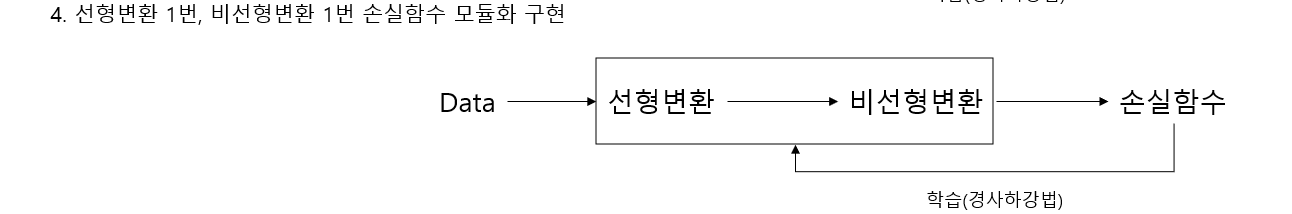

#### 4-1번 문제 : 다음을 만족하는 Sigmoid 비선형 변환을 클래스로 설계하세요
1. Sigmoid $z = \frac{1}{1+e^{-y}}$ 기능을 하는 forward 함수 설계
2. Sigmoid의 미분 : $\frac{\partial{z}}{\partial{y}} = z(1-z)$ 기능을 하는 backward 함수 설계
- 클래스 구현 후 y=0 에 대한 전파 출력값을 출력하세요

In [1]:
import numpy as np

class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, y):
        out = 1 / (1 + np.exp(-y)) 
        self.out = out
        return out
    
    def backward(self, dout=1.0):
        dx = dout * self.out * (1.0 - self.out)
        return dx
    
y = 0
model = Sigmoid()
z = model.forward(y)
print(f"z: {z}")
z_grad = model.backward()
print(f"z_grad: {z_grad}")


z: 0.5
z_grad: 0.25


In [2]:
class LinearModel:
    def __init__(self):
        self.w = np.random.randn(1)
        self.b = np.zeros(1)
        self.x = None # forward에서의 x를 backward에서 갖다 써야하니까 x도 self를 취해줌
    
    def forward(self, x):
        self.x = x
        return np.dot(self.w, self.x) + self.b # y = wx+b
    
    def backward(self, dout):
        # print(f'loss: {dout}')
        dw = np.dot(dout, self.x)
        db = np.dot(dout, 1)
        dx = np.dot(dout, self.w)
        return dw, db, dx

In [3]:
class MeanSquardError:
    def __init__(self):
        self.y = None
        self.t = None

    def forward(self, y, t):
        self.t = t
        self.y = y
        return np.dot(0.5, (self.y - self.t)**2) # 0.5(y-t)^2
    
    def backward(self, dout):
        return np.dot((self.y - self.t), dout)

# 
#### 4-2번 문제 : 앞서 설계한 LinearModel, Sigmoid, MeanSquaredError 클래스를 사용하여 4번 문제와 같이 전파와 역전파 출력값을 과정마다 출력해보세요
1. 입력 x = 2
2. 정답 t = 1

In [4]:
x = 2
t = 1
np.random.seed(0)
model = LinearModel()
Non_model = Sigmoid()
mse = MeanSquardError()

# forward
out = model.forward(x) # out = y = wx+b
print(f"y = {out}") 
z_out = Non_model.forward(out) # z_out = sigmoid(y)
print(f"z: {z_out}")
out = mse.forward(z_out, t) # out = loss(z-t)^2
print(f"loss: {out}")

y = [3.52810469]
z: [0.97147694]
loss: [0.00040678]


In [5]:
# backward
dout = mse.backward(dout=1.0) # dout = z - t
print(f"dL/dz: {dout}")
dout = Non_model.backward(z_out) #(1-z)*z
print(f"dz/dy: {dout}")
dw, db, dout = model.backward(dout)
print(f"dw: {dw}, db: {db}, dx: {dout}")

dL/dz: [-0.02852306]
dz/dy: [0.02691913]
dw: [0.05383827], db: [0.02691913], dx: 0.047486762197966194


# 
#### 4-3번 문제 : 이제 위와 같이 설계된 모델에 대해 100번 경사하강법 학습하는 코드를 작성해보세요.
1. 입력 x = 2, 정답 t = 1
2. 학습률 = 0.5
3. 매 경사하강법마다 예측값과, 손실값 출력

In [7]:
x = 2
t = 1
lr = 0.5

np.random.seed(0)
model = LinearModel()
Non_model = Sigmoid()
mse = MeanSquardError()

for i in range(0, 100):
    # forward
    out = model.forward(x) # out = y = wx+b
    z_out = Non_model.forward(out) # z_out = sigmoid(y)
    out = mse.forward(z_out, t) # out = loss(z-t)^2
    print(f"[{i+1}번째 반복] 예측값 z: {z_out}, 손실값 loss: {out}")

    # backward
    dout = mse.backward(dout=1.0) # dout = z - t
    dout = Non_model.backward(z_out) #(1-z)*z
    dw, db, dout = model.backward(dout)

    model.w += np.dot(lr, dw)
    model.b += np.dot(lr, db)

[1번째 반복] 예측값 z: [0.97147694], 손실값 loss: [0.00040678]
[2번째 반복] 예측값 z: [0.97328372], 손실값 loss: [0.00035688]
[3번째 반복] 예측값 z: [0.97488054], 손실값 loss: [0.00031549]
[4번째 반복] 예측값 z: [0.9763014], 손실값 loss: [0.00028081]
[5번째 반복] 예측값 z: [0.97757343], 손실값 loss: [0.00025148]
[6번째 반복] 예측값 z: [0.97871852], 손실값 loss: [0.00022645]
[7번째 반복] 예측값 z: [0.97975452], 손실값 loss: [0.00020494]
[8번째 반복] 예측값 z: [0.9806961], 손실값 loss: [0.00018632]
[9번째 반복] 예측값 z: [0.98155545], 손실값 loss: [0.0001701]
[10번째 반복] 예측값 z: [0.98234279], 손실값 loss: [0.00015589]
[11번째 반복] 예측값 z: [0.98306668], 손실값 loss: [0.00014337]
[12번째 반복] 예측값 z: [0.98373443], 손실값 loss: [0.00013228]
[13번째 반복] 예측값 z: [0.98435226], 손실값 loss: [0.00012243]
[14번째 반복] 예측값 z: [0.98492551], 손실값 loss: [0.00011362]
[15번째 반복] 예측값 z: [0.98545879], 손실값 loss: [0.00010572]
[16번째 반복] 예측값 z: [0.98595611], 손실값 loss: [9.86154823e-05]
[17번째 반복] 예측값 z: [0.98642094], 손실값 loss: [9.21953742e-05]
[18번째 반복] 예측값 z: [0.98685636], 손실값 loss: [8.63776269e-05]
[19번째 반복] 예측값 z: [0.98726504